# Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## 1. Read the column description and ensure you understand each attribute well 

Attribute Information:

ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer ($000)

ZIP Code : Home Address ZIP code.

Family : Family size of the customer

CCAvg : Avg. spending on credit cards per month ($000)

Education : Education Level. 1: Undergrad;   2: Graduate;    3: Advanced/Professional

Mortgage : Value of house mortgage if any. ($000)

Personal Loan : Did this customer accept the personal loan offered in the last campaign?

Securities Account : Does the customer have a securities account with the bank?

CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

Online : Does the customer use internet banking facilities?

Credit card : Does the customer use a credit card issued by

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import warnings 
warnings.filterwarnings('ignore')

## 2. Study the data distribution in each attribute, share your findings. (5 points)

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head(50)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.shape

(5000, 14)

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
print(df.loc[df['Experience'] == -3])

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
2618  2619   23          -3      55     92704       3    2.4          2   
3626  3627   24          -3      28     90089       4    1.0          3   
4285  4286   23          -3     149     93555       2    7.2          1   
4514  4515   24          -3      41     91768       4    1.0          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
2618       145              0                   0           0       1   
3626         0              0                   0           0       0   
4285         0              0                   0           0       1   
4514         0              0                   0           0       1   

      CreditCard  
2618           0  
3626           0  
4285           0  
4514           0  


## Experience : #years of professional experience, So minimum professional experience cannot be less than ZERO, 

## Experience as -3years can be a typographic error and it should be rectified by one of the possibilities as taking its absolute value through function(abs)

In [9]:
df['Experience']= df['Experience'].abs()

In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


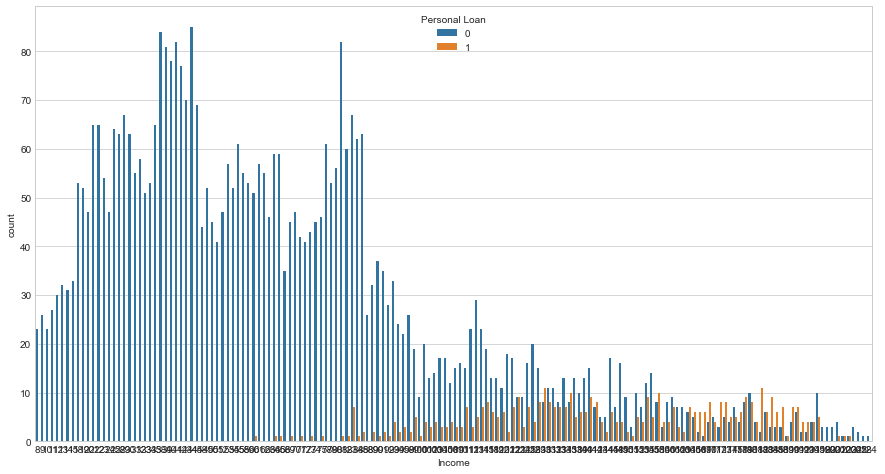

In [11]:
fig,ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=df,hue='Personal Loan')

In [12]:
df.skew(axis = 0, skipna = True)

ID                     0.000000
Age                   -0.029341
Experience            -0.010038
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

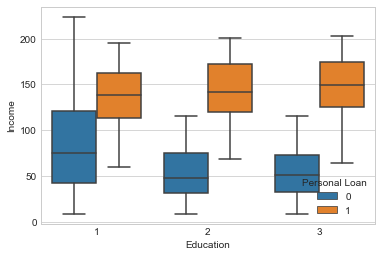

In [13]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

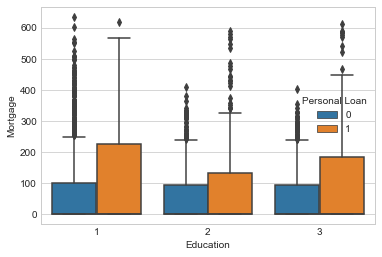

In [14]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

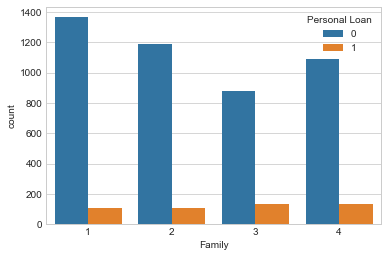

In [15]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

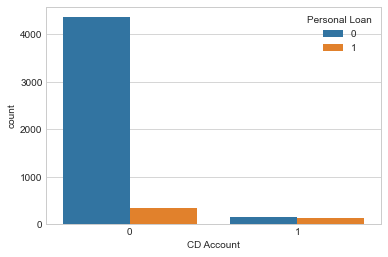

In [16]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

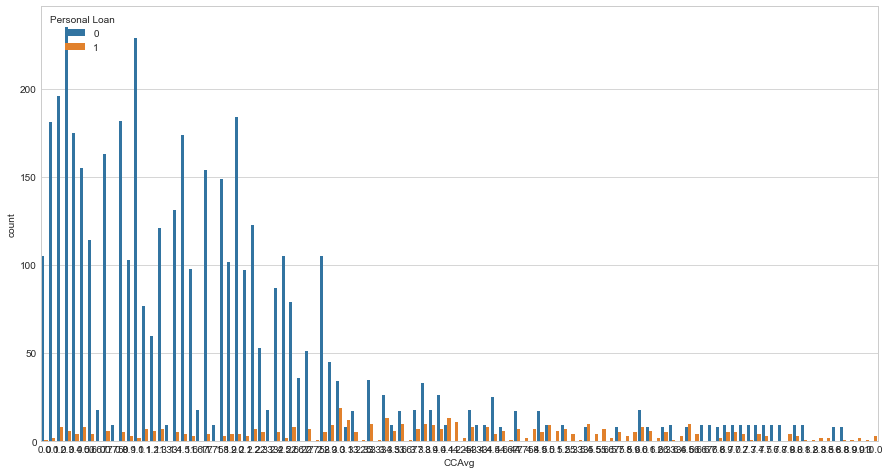

In [17]:
fig,ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='CCAvg',data=df,hue='Personal Loan')

# FINDINGS FROM FEATURES :

# 1."Age" is almost normally distributed, majority of customers are between age 30 to 60 years. Median is almost equal to mean.
# 2."Experience" is also almost normally distibuted and mean is also equal to median. Some negative values are already replaced by absolute values as Experience can not be negative.
# 3."Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
# 4."Income" mean is greater than median. Majority of the customers have income between 45-55K.
# 5."CCAvg" majority of the customers spend less than 2.5K and the average spending is between 0-10K.
# 6."Mortage" almost 70% of the customers have Value of house mortgage less than 40K and the maximum value is 635K(too high).
# 7.Families with income less than 100K are less likely to take loan,than families with high income.
# 8.The customers whose education level is 1 is having more income than the others.
# 9.The customers with and without Personal Loan have high Mortage.
# 10. Family with size more than 3 is taking more Personal loan as compare to other family size.¶
# 11.Majority of customers having no CD Account do not have Personal loan.
# 12.Customers with Personal Loan have less count in most of the conditions to establish any relationship.
# 13. Customers having high CCAverage are having Personal Loan

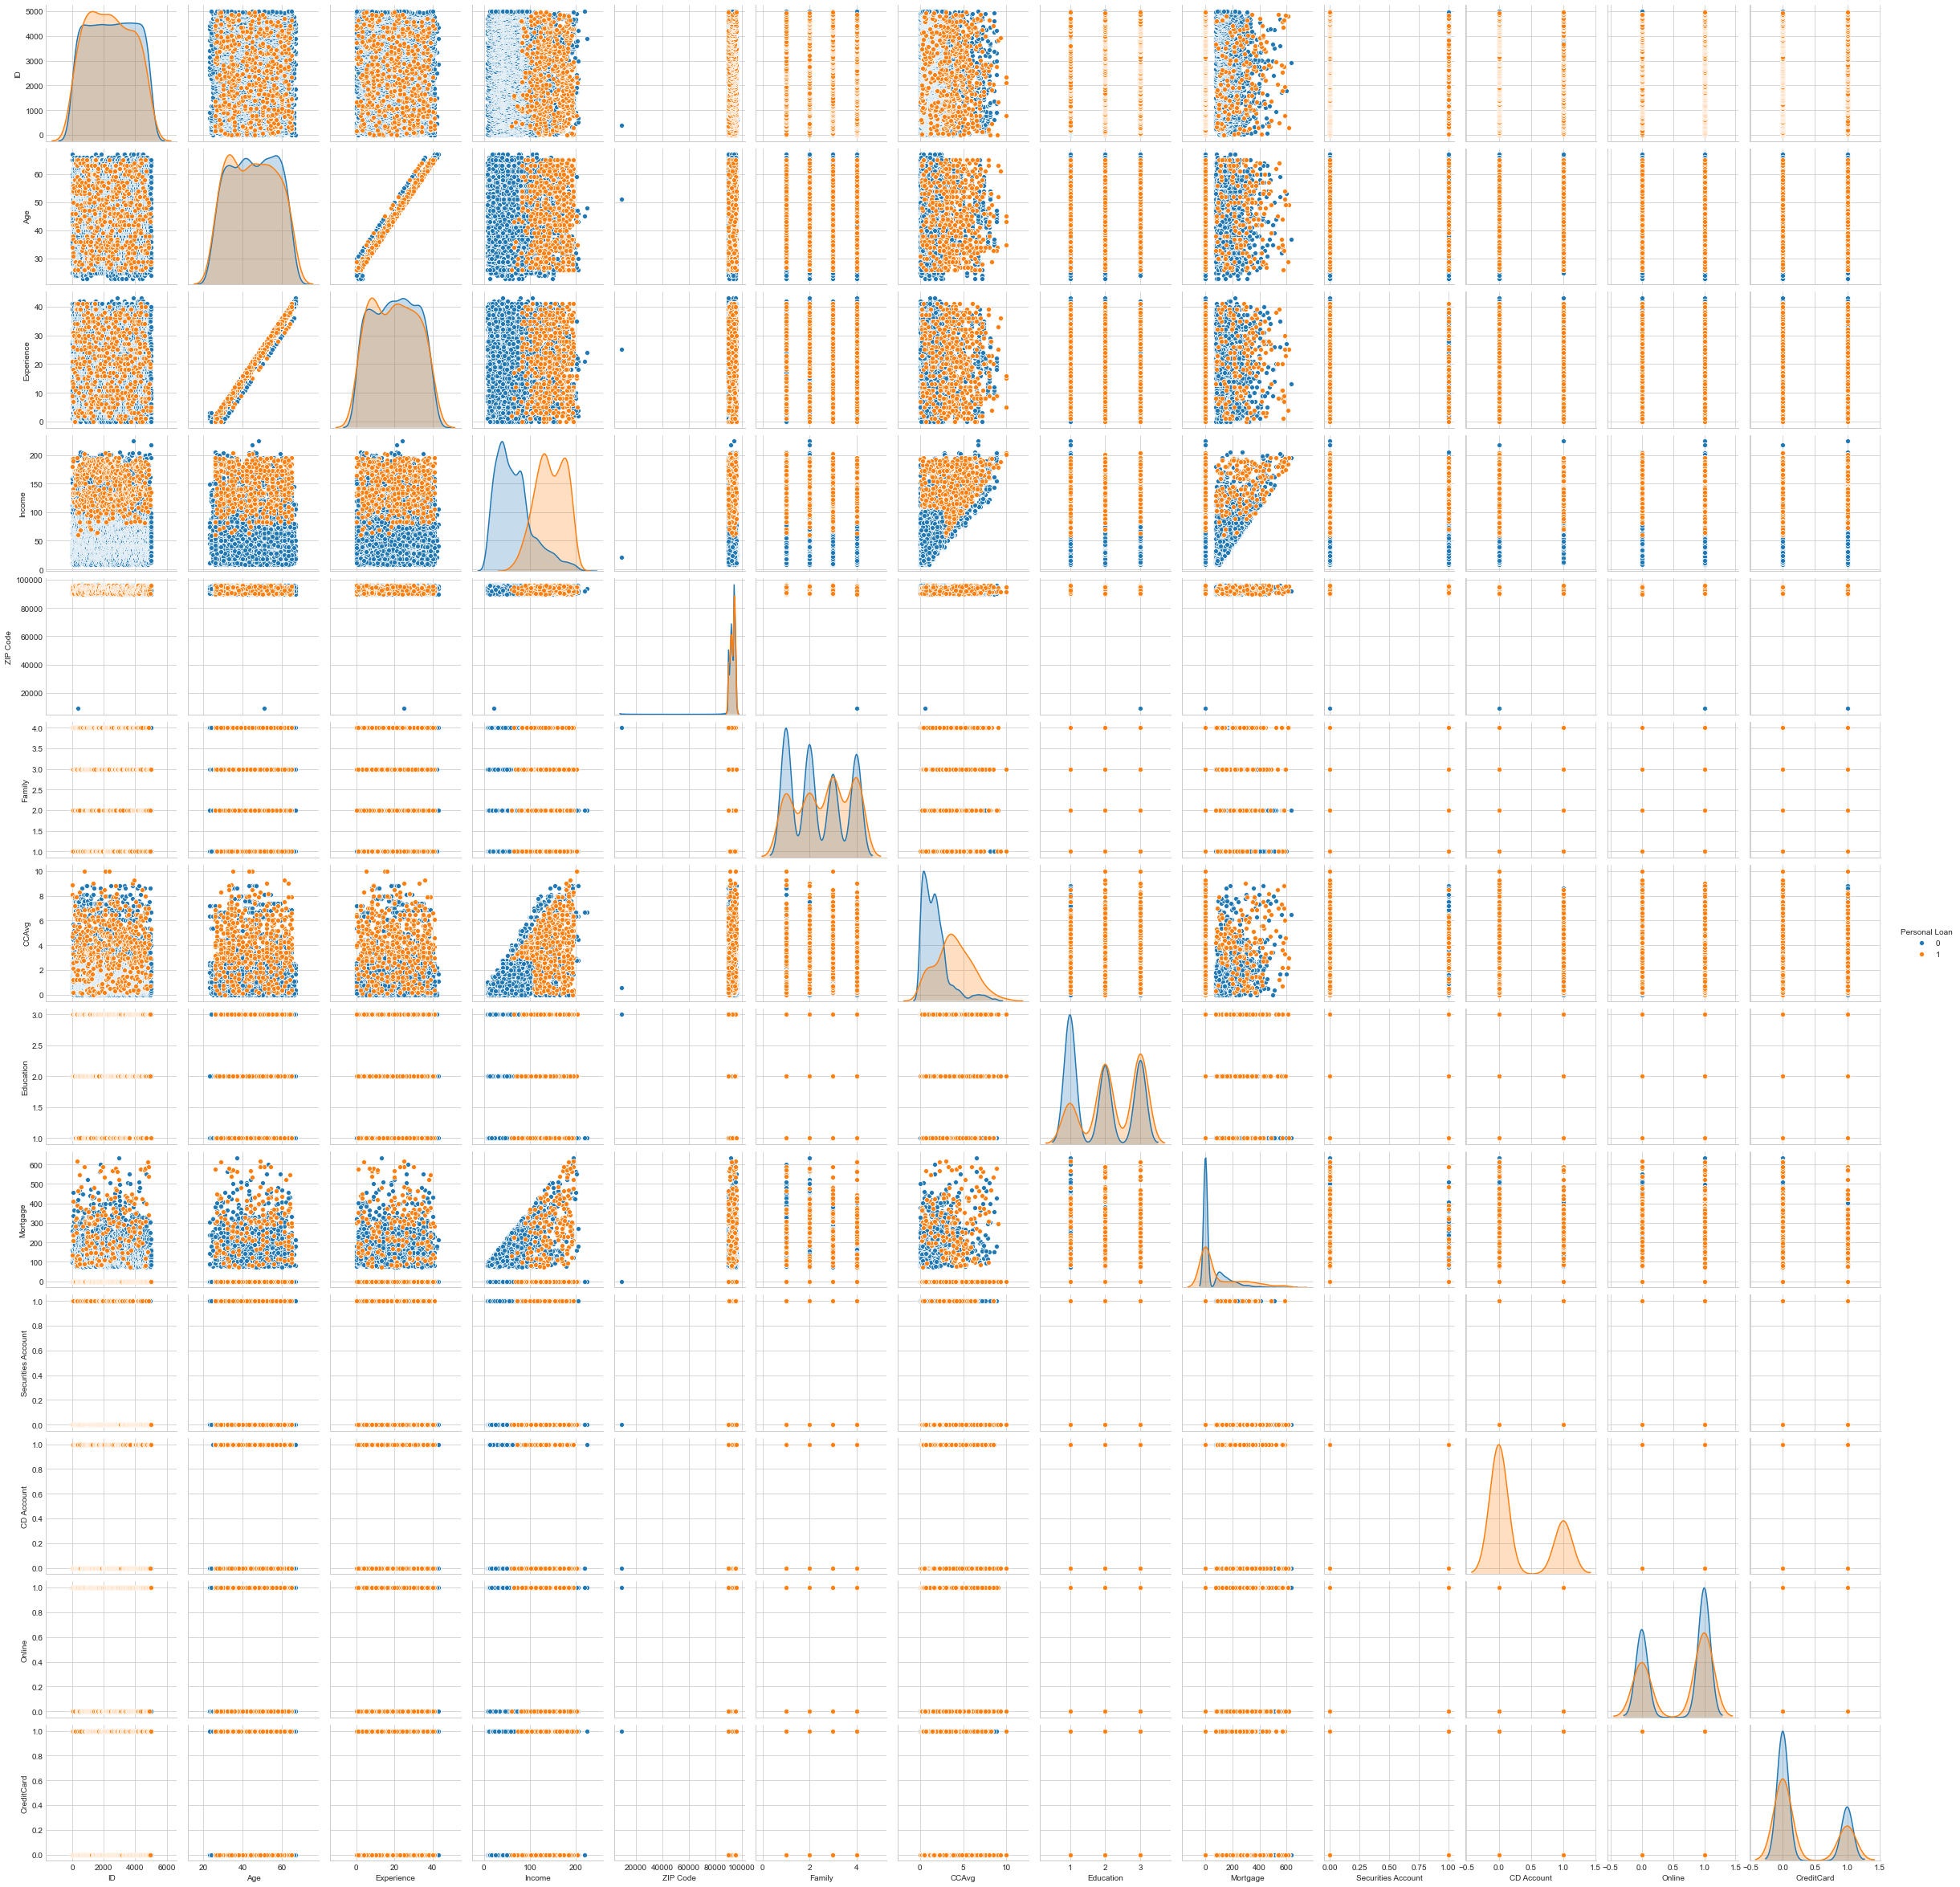

In [18]:
sns_plot= sns.pairplot(df, hue= "Personal Loan", kind="scatter") 
# plots scatter plots for every pair of attributes and histograms along the diagonal
# sns_plot.savefig("Bankloan.pdf")

In [19]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


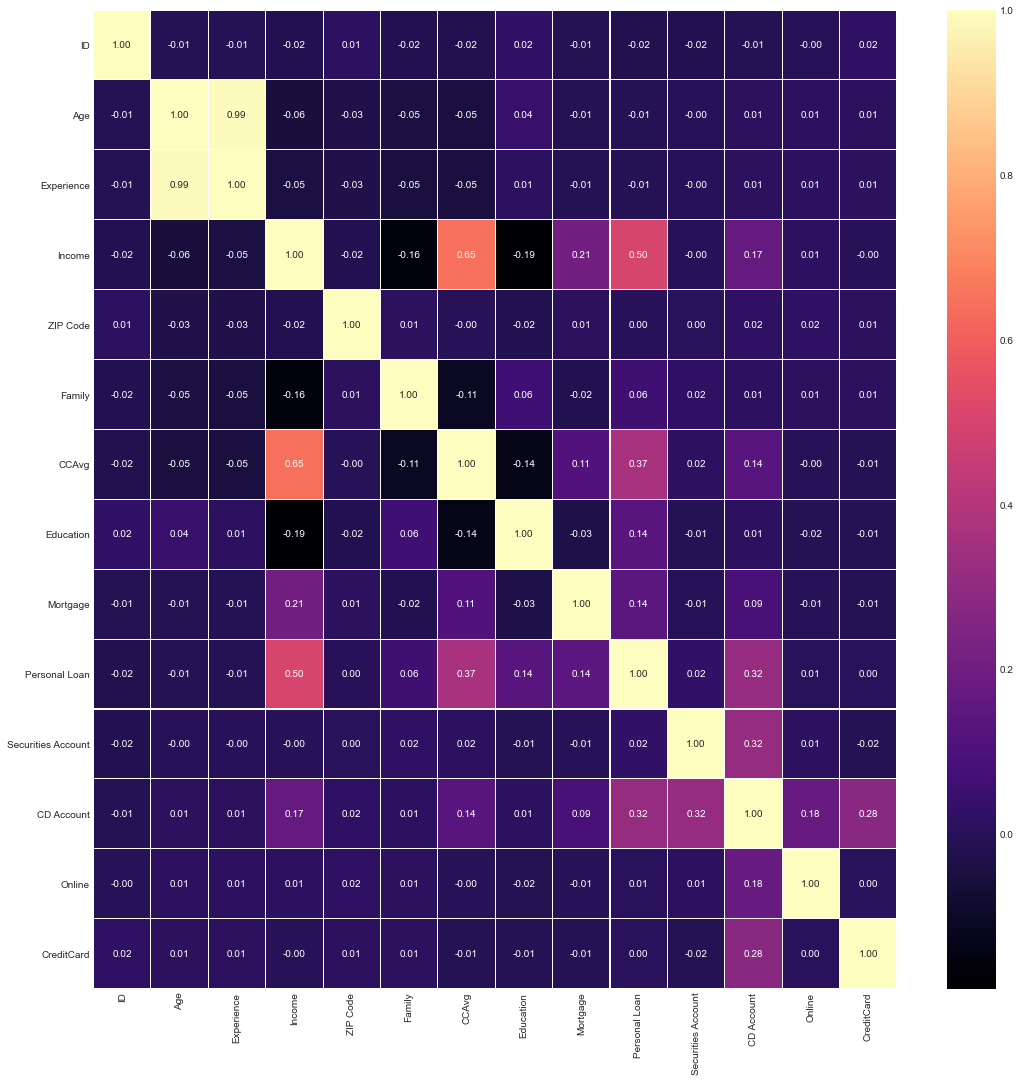

In [20]:
fig,ax = plt.subplots(figsize=(18, 18))   
sns_heat =sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
# sns_heat.figure.savefig("Bankloanheatmap.pdf")
plt.show()

# FINDINGS:
# 1) There is strong positive correlation between AGE & EXPERIENCE
# 2) There is good positive correlation between INCOME & CCAVG(Credit card spending)
# 3) There is partial positive correlation between INCOME & PERSONAL LOAN
# 4) There is no linear correlation between AGE & INCOME
# 5) There is no linear correlation between PERSONAL LOAN & other variables
# 6) "Family" and "Education" are evenly distributed

# 3. Get the target column distribution. Your comments

In [21]:
df.groupby(["Personal Loan"]).count()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


# Comments:
# 1) Most are Non-Personal Loan Customers. The ratio is almost 9.5:1 in favor of class 0.  The model's ability to predict class 0 will be better than predicting class 1. 
# 2) Data is more skewed towards the NON-Personal Loan Customers while Customers accepted Personal Loan last time are very less in comparison to the other group.
# 3) While our soft target can be the group who already took the personal loan last time as he posses experience of product and don't have any hesitation towards it.

# 4. Split the data into training and test set in the ratio of 70:30 respectively


In [22]:
df = df.drop(labels = "ID", axis = 1)

In [23]:
df1 = df.copy()
df1.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
# Separating the Target variable(dependant) from the independant variables
X_df = df.iloc[:, df.columns != 'Personal Loan'] # contain all Columns of independant variables
y_df = df.iloc[:, df.columns == 'Personal Loan'] # Target column of dependant variable

In [25]:
X_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [26]:
test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=test_size, random_state=seed)

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

# Applying Logistic Regression Model on all columns

In [27]:
# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

t= list(X_train.columns)

coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

        Age  Experience    Income  ZIP Code    Family     CCAvg  Education  \
0 -0.000364   -0.000378  0.035857 -0.000065  0.000181  0.001086   0.000243   

   Mortgage  Securities Account  CD Account    Online  CreditCard  intercept  
0  0.000718            0.000024    0.000141  0.000007    0.000005  -0.000001  


In [28]:
model_score = model.score(X_test, y_test)
Logistics_Regression_all_Columns_unscaled_score = model_score
Logistics_Regression_all_Columns_unscaled_confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print("Logistics_Regression_all_Columns_unscaled_score:    ", Logistics_Regression_all_Columns_unscaled_score)
print("Logistics_Regression_all_Columns_unscaled_confusion_matrix: \n ", Logistics_Regression_all_Columns_unscaled_confusion_matrix)

Logistics_Regression_all_Columns_unscaled_score:     0.9113333333333333
Logistics_Regression_all_Columns_unscaled_confusion_matrix: 
  [[1319   32]
 [ 101   48]]


# Here at model level overall accuracy is 91% but it may be misleading as data is highly skewed towards Non-loan customer
# So now we will check at the class level accuracy of Target class

In [29]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.60      0.32      0.42       149

    accuracy                           0.91      1500
   macro avg       0.76      0.65      0.69      1500
weighted avg       0.90      0.91      0.90      1500



# 1) Recall for Loaned-customers is 32% only which is not good
# 2) Precision for Loaned-customers is 60% only which shows that model is wrong in 40% of the cases
# 3) Precision and Recall Accuracy rate for both the cases should be minimum 80%(better-90%)

# Improve the model -----------------------------Iteration 2 ---------------------------------------

In [30]:
# To scale the dimensions we need scale function which is part of scikit learn preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the df. This will produce a numpy array

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [31]:
# Fit the model
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_predict_scaled = model_scaled.predict(X_test_scaled)
model_score_scaled = model_scaled.score(X_test_scaled, y_test)
Logistics_Regression_all_Columns_scaled_score = model_score_scaled
Logistics_Regression_all_Columns_scaled_confusion_matrix = metrics.confusion_matrix(y_test, y_predict_scaled)
print("Logistics_Regression_all_Columns_scaled_score:   ",Logistics_Regression_all_Columns_scaled_score)
print("Logistics_Regression_all_Columns_scaled_confusion_matrix:  \n", Logistics_Regression_all_Columns_scaled_confusion_matrix)

Logistics_Regression_all_Columns_scaled_score:    0.9513333333333334
Logistics_Regression_all_Columns_scaled_confusion_matrix:  
 [[1335   16]
 [  57   92]]


In [32]:
print(metrics.classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.62      0.72       149

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



# Applying Logistic Regression Model on reduced columns

In [33]:
df_dropped=df1.drop(['ZIP Code','Online', 'CreditCard', 'Securities Account'], axis =1 )
df_dropped.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0
5,37,13,29,4,0.4,2,155,0,0
6,53,27,72,2,1.5,2,0,0,0
7,50,24,22,1,0.3,3,0,0,0
8,35,10,81,3,0.6,2,104,0,0
9,34,9,180,1,8.9,3,0,1,0


In [34]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df_dropped = df_dropped.loc[:, df_dropped.columns != 'Personal Loan'] # Other than Target Column array
y_df_dropped = df_dropped.loc[:, df_dropped.columns == 'Personal Loan'] #  Target column array

In [35]:
X_df_dropped

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account
0,25,1,49,4,1.6,1,0,0
1,45,19,34,3,1.5,1,0,0
2,39,15,11,1,1.0,1,0,0
3,35,9,100,1,2.7,2,0,0
4,35,8,45,4,1.0,2,0,0
...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0
4996,30,4,15,4,0.4,1,85,0
4997,63,39,24,2,0.3,3,0,0
4998,65,40,49,3,0.5,2,0,0


In [36]:

test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_df_dropped, y_df_dropped, test_size=test_size, random_state=seed)

# Fit the model
model_dropped = LogisticRegression()
model_dropped.fit(X_train_dropped, y_train_dropped)
y_predict_dropped = model_dropped.predict(X_test_dropped)

t_dropped= list(X_train_dropped.columns)

coef_df_dropped = pd.DataFrame(model_dropped.coef_, columns= t_dropped)
coef_df_dropped['intercept'] = model_dropped.intercept_
print(coef_df_dropped)

        Age  Experience   Income    Family     CCAvg  Education  Mortgage  \
0 -0.447631    0.437756  0.04345  0.558615  0.157137   1.445217  0.000637   

   CD Account  intercept  
0     2.09997  -0.300037  


In [37]:
model_score_dropped = model_dropped.score(X_test_dropped, y_test_dropped)
Logistics_Regression_reduced_Columns_unscaled_score = model_score_dropped
Logistics_Regression_reduced_Columns_unscaled_confusion_matrix = metrics.confusion_matrix(y_test_dropped, y_predict_dropped)

print("Logistics_Regression_reduced_Columns_unscaled_score:   ",Logistics_Regression_reduced_Columns_unscaled_score)
print("Logistics_Regression_reduced_Columns_unscaled_confusion_matrix:  \n", Logistics_Regression_reduced_Columns_unscaled_confusion_matrix)


Logistics_Regression_reduced_Columns_unscaled_score:    0.9473333333333334
Logistics_Regression_reduced_Columns_unscaled_confusion_matrix:  
 [[1332   19]
 [  60   89]]


In [38]:
print(metrics.classification_report(y_test_dropped, y_predict_dropped))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.82      0.60      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



# 1) Recall for Loaned-customers is improved from 46% to 60%.
# 2) Precision for Loaned-customers is improved from 70% to 82% only which shows that model is still wrong in 18% of the cases
# 3) Precision Accuracy rate for both the cases is above 80% which is acceptable (better-90%)
# 4) Recall Accuracy rate for both the cases should be minimum 80%(better-90%)

# Improve the reduced column model ---------------Iteration 2 -----------¶

In [39]:
# To scale the dimensions we need scale function which is part of scikit learn preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_train_dropped_scaled = preprocessing.scale(X_train_dropped)
X_test_dropped_scaled = preprocessing.scale(X_test_dropped)

In [40]:
# Fit the model
model_dropped_scaled = LogisticRegression()
model_dropped_scaled.fit(X_train_dropped_scaled, y_train_dropped)
y_predict_dropped_scaled = model_dropped_scaled.predict(X_test_dropped_scaled)
model_dropped_score_scaled = model_dropped_scaled.score(X_test_dropped_scaled, y_test_dropped)
Logistics_Regression_reduced_Columns_scaled_score = model_dropped_score_scaled
Logistics_Regression_reduced_Columns_scaled_confusion_matrix = metrics.confusion_matrix(y_test_dropped, y_predict_dropped_scaled)
print("Logistics_Regression_reduced_Columns_scaled_score:   ", Logistics_Regression_reduced_Columns_scaled_score)
print("Logistics_Regression_reduced_Columns_scaled_confusion_matrix:   \n", Logistics_Regression_reduced_Columns_scaled_confusion_matrix)

Logistics_Regression_reduced_Columns_scaled_score:    0.9446666666666667
Logistics_Regression_reduced_Columns_scaled_confusion_matrix:   
 [[1329   22]
 [  61   88]]


In [41]:
print(metrics.classification_report(y_test_dropped, y_predict_dropped_scaled))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.80      0.59      0.68       149

    accuracy                           0.94      1500
   macro avg       0.88      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



# NOTE: This shows that reducing the columns whether scaled or unscaled does not provide better results in this case than Model with scaled columns

# Applying K Nearest Neighbor(KNN) Model on all columns

In [42]:
df2 = df.copy()
df2.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [43]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df = df2.loc[:, df.columns != 'Personal Loan'] # Target Column array
y_df = df2.loc[:, df.columns == 'Personal Loan'] # Other than Target column array

In [44]:
from scipy.stats import zscore
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

feature_df_z = X_df.apply(zscore)  # convert all attributes to Z scale 

feature_df_z.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.001421e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.764019e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.879059e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-1.179249e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.643209e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,2.003268e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [45]:
X = np.array(feature_df_z)
X.shape

(5000, 12)

In [46]:
y = np.array(y_df)
y.shape

(5000, 1)

In [47]:
test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [48]:
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500, 1)


In [49]:
print(X_test.shape)
print(y_test.shape)

(1500, 12)
(1500, 1)


In [50]:
X_df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [51]:
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors=1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9513333333333334
0.952
0.944


In [52]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))


In [53]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


# Plot misclassification error vs k (with k value on X-axis) using matplotlib

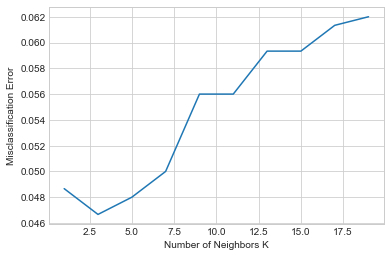

In [54]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [55]:
from sklearn.metrics import recall_score
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights= 'distance')

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
knn_all_columns_accuracy_score = accuracy_score(y_test, y_pred)
knn_all_columns_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(recall_score(y_test, y_pred))


print("KNN_all_Columns_accuracy_score:   ", knn_all_columns_accuracy_score)
print("KNN_all_Columns_confusion_matrix:   \n", knn_all_columns_confusion_matrix)

0.5906040268456376
KNN_all_Columns_accuracy_score:    0.9526666666666667
KNN_all_Columns_confusion_matrix:   
 [[1341   10]
 [  61   88]]


# Applying KNN Model on reduced column

In [56]:
df3 = df_dropped.copy()
df3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0


In [57]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df_dropped = df3.loc[:, df3.columns != 'Personal Loan'] # Other than Target Column array
y_df_dropped = df3.loc[:, df3.columns == 'Personal Loan'] #  Target column array

In [58]:
from scipy.stats import zscore
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

feature_df_z_dropped = X_df_dropped.apply(zscore)  # convert all attributes to Z scale 

feature_df_z_dropped.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.001421e-16,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,4.426903e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.764019e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-2.535403e-01
25%,-9.019702e-01,-8.879059e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-2.535403e-01
50%,-2.952359e-02,-1.179249e-02,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-2.535403e-01
75%,8.429230e-01,8.643209e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-2.535403e-01
max,1.889859e+00,2.003268e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,3.944146e+00


In [59]:
# Transform data into features and target
import numpy as np
X = np.array(feature_df_z_dropped) 
y = np.array(y_df_dropped)

print(X.shape)
print(y.shape)

(5000, 8)
(5000, 1)


In [60]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [61]:
print(X_train.shape)
print(y_train.shape)

(3500, 8)
(3500, 1)


In [62]:
print(X_test.shape)
print(y_test.shape)

(1500, 8)
(1500, 1)


In [63]:
# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.968
0.9653333333333334
0.9673333333333334
0.964


In [64]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [65]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


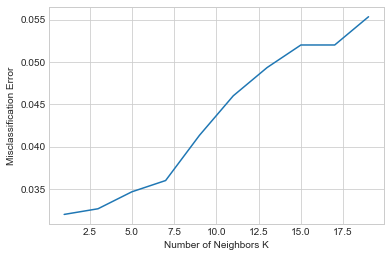

In [66]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [67]:
#Use k=1 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
knn_reduced_columns_accuracy_score = accuracy_score(y_test, y_pred)   #Accuracy of KNN model
knn_reduced_columns_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  
print(recall_score(y_test, y_pred))

print("KNN_reduced_Columns_accuracy_score:   ", knn_reduced_columns_accuracy_score)
print("KNN_reduced_Columns_confusion_matrix:   \n", knn_reduced_columns_confusion_matrix)

0.7248322147651006
KNN_reduced_Columns_accuracy_score:    0.968
KNN_reduced_Columns_confusion_matrix:   
 [[1344    7]
 [  41  108]]


# Applying Naive Bayes Model on all columns

In [68]:
df4 = df.copy()
df4.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [69]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df = df4.loc[:, df4.columns != 'Personal Loan'] # Target Column array
y_df = df4.loc[:, df4.columns == 'Personal Loan'] # Other than Target column array

In [70]:
X = np.array(X_df)
y = np.array(y_df)
test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [71]:
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500, 1)


In [72]:
print(X_test.shape)
print(y_test.shape)

(1500, 12)
(1500, 1)


In [73]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))


GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [74]:
nb_all_columns_accuracy_score = accuracy_score(expected, predicted, normalize = True) #Accuracy of Naive Bayes' Model
nb_all_columns_confusion_matrix = metrics.confusion_matrix(expected, predicted)

print("Naive_Bayes_all_Columns_accuracy_score:   ", nb_all_columns_accuracy_score)
print("Naive_Bayes_all_Columns_confusion_matrix:   \n", nb_all_columns_confusion_matrix)

Naive_Bayes_all_Columns_accuracy_score:    0.882
Naive_Bayes_all_Columns_confusion_matrix:   
 [[1239  112]
 [  65   84]]


# Applying Naive Bayes Model on reduced columns¶


In [75]:
df5 = df_dropped.copy()
df5.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0


In [76]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df_dropped = df5.loc[:, df5.columns != 'Personal Loan'] # Target Column array
y_df_dropped = df5.loc[:, df5.columns == 'Personal Loan'] # Other than Target column array

In [77]:
X = np.array(X_df_dropped)
y = np.array(y_df_dropped)

test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [78]:
print(X_train.shape)
print(y_train.shape)

(3500, 8)
(3500, 1)


In [79]:
print(X_test.shape)
print(y_test.shape)

(1500, 8)
(1500, 1)


In [80]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.42      0.56      0.48       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [81]:
nb_reduced_columns_accuracy_score =accuracy_score(expected, predicted, normalize = True) #Accuracy of Naive Bayes' Model
nb_reduced_columns_confusion_matrix = metrics.confusion_matrix(expected, predicted)

print("Naive_Bayes_reduced_Columns_accuracy_score:   ", nb_reduced_columns_accuracy_score)
print("Naive_Bayes_reduced_Columns_confusion_matrix:   \n", nb_reduced_columns_confusion_matrix)

Naive_Bayes_reduced_Columns_accuracy_score:    0.8806666666666667
Naive_Bayes_reduced_Columns_confusion_matrix:   
 [[1238  113]
 [  66   83]]


# Applying Support Vector Machine(SVM) on all columns

In [82]:
df5 = df.copy()
df5.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [83]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df = df5.loc[:, df5.columns != 'Personal Loan'] # Target Column array
y_df = df5.loc[:, df5.columns == 'Personal Loan'] # Other than Target column array

In [84]:
test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=test_size, random_state=seed)

In [85]:
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500, 1)


In [86]:
print(X_test.shape)
print(y_test.shape)

(1500, 12)
(1500, 1)


In [87]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)



svm_train_all_columns_unscaled_accuracy_score = svc.score(X_train, y_train)
svm_test_all_columns_unscaled_accuracy_score = svc.score(X_test, y_test)
prediction = svc.predict(X_test)
svm_all_columns_unscaled_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_all_columns_unscaled_accuracy_score:   ", svm_train_all_columns_unscaled_accuracy_score)
print("SVM_test_all_columns_unscaled_accuracy_score:   ", svm_test_all_columns_unscaled_accuracy_score)
print("SVM_all_columns_unscaled_confusion_matrix:   \n", svm_all_columns_unscaled_confusion_matrix)

SVM_train_all_columns_unscaled_accuracy_score:    0.9054285714285715
SVM_test_all_columns_unscaled_accuracy_score:    0.9006666666666666
SVM_all_columns_unscaled_confusion_matrix:   
 [[1351  149]
 [   0    0]]


In [88]:
#SVM requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately
#on the same scale and than see the performance
# Scale the data points using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [89]:
# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)


# check the accuracy on the training set

svm_train_all_columns_scaled_Linear_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_all_columns_scaled_Linear_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_all_columns_scaled_Linear_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_all_columns_scaled_Linear_kernel_accuracy_score:   ", svm_train_all_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_Linear_kernel_accuracy_score:   ", svm_test_all_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_all_columns_scaled_Linear_kernel_confusion_matrix:   \n", svm_all_columns_scaled_Linear_kernel_confusion_matrix)

SVM_train_all_columns_scaled_Linear_kernel_accuracy_score:    0.9534285714285714
SVM_test_all_columns_scaled_Linear_kernel_accuracy_score:    0.9526666666666667
SVM_all_columns_scaled_Linear_kernel_confusion_matrix:   
 [[1337   57]
 [  14   92]]


In [90]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429


In [91]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_scaled, y_train)

SVC()

In [92]:
svm_train_all_columns_scaled_rbf_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_all_columns_scaled_rbf_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_all_columns_scaled_rbf_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_all_columns_scaled_rbf_kernel_accuracy_score:   ", svm_train_all_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_rbf_kernel_accuracy_score:   ", svm_test_all_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_all_columns_scaled_rbf_kernel_confusion_matrix:   \n", svm_all_columns_scaled_rbf_kernel_confusion_matrix)

SVM_train_all_columns_scaled_rbf_kernel_accuracy_score:    0.9768571428571429
SVM_test_all_columns_scaled_rbf_kernel_accuracy_score:    0.9686666666666667
SVM_all_columns_scaled_rbf_kernel_confusion_matrix:   
 [[1345   41]
 [   6  108]]


In [93]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['RBF'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429
0,RBF,0.976857


In [94]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train_scaled, y_train)

svm_train_all_columns_scaled_Poly_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_all_columns_scaled_Poly_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_all_columns_scaled_Poly_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_all_columns_scaled_Poly_kernel_accuracy_score:   ", svm_train_all_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_Poly_kernel_accuracy_score:   ", svm_test_all_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_all_columns_scaled_Poly_kernel_confusion_matrix:   \n", svm_all_columns_scaled_Poly_kernel_confusion_matrix)

SVM_train_all_columns_scaled_Poly_kernel_accuracy_score:    0.9834285714285714
SVM_test_all_columns_scaled_Poly_kernel_accuracy_score:    0.9606666666666667
SVM_all_columns_scaled_Poly_kernel_confusion_matrix:   
 [[1349   57]
 [   2   92]]


In [95]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Poly'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429
0,RBF,0.976857
0,Poly,0.983429


In [96]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train_scaled, y_train)


svm_train_all_columns_scaled_sigmoid_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_all_columns_scaled_sigmoid_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_all_columns_scaled_sigmoid_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_all_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_train_all_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_test_all_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_all_columns_scaled_sigmoid_kernel_confusion_matrix:   \n", svm_all_columns_scaled_sigmoid_kernel_confusion_matrix)

SVM_train_all_columns_scaled_sigmoid_kernel_accuracy_score:    0.8417142857142857
SVM_test_all_columns_scaled_sigmoid_kernel_accuracy_score:    0.49866666666666665
SVM_all_columns_scaled_sigmoid_kernel_confusion_matrix:   
 [[663  64]
 [688  85]]


In [97]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Sigmoid'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429
0,RBF,0.976857
0,Poly,0.983429
0,Sigmoid,0.841714


# Applying Support Vector Machine(SVM) on reduced columns

In [98]:
df6 = df_dropped.copy()
df6.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0


In [99]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df_dropped = df6.loc[:, df6.columns != 'Personal Loan'] # Target Column array
y_df_dropped = df6.loc[:, df6.columns == 'Personal Loan'] # Other than Target column array

In [100]:
test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=test_size, random_state=seed)

In [101]:
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500, 1)


In [102]:
print(X_test.shape)
print(y_test.shape)

(1500, 12)
(1500, 1)


In [103]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)


svm_train_reduced_columns_unscaled_accuracy_score = svc.score(X_train, y_train)
svm_test_reduced_columns_unscaled_accuracy_score = svc.score(X_test, y_test)
prediction = svc.predict(X_test)
svm_reduced_columns_unscaled_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_reduced_columns_unscaled_accuracy_score:   ", svm_train_reduced_columns_unscaled_accuracy_score)
print("SVM_test_reduced_columns_unscaled_accuracy_score:   ", svm_test_reduced_columns_unscaled_accuracy_score)
print("SVM_reduced_columns_unscaled_confusion_matrix:   \n", svm_reduced_columns_unscaled_confusion_matrix)

SVM_train_reduced_columns_unscaled_accuracy_score:    0.9054285714285715
SVM_test_reduced_columns_unscaled_accuracy_score:    0.9006666666666666
SVM_reduced_columns_unscaled_confusion_matrix:   
 [[1351  149]
 [   0    0]]


In [104]:
#SVM requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately
#on the same scale and than see the performance
# Scale the data points using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [105]:
# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)

svm_train_reduced_columns_scaled_Linear_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_reduced_columns_scaled_Linear_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_reduced_columns_scaled_Linear_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_reduced_columns_scaled_Linear_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_Linear_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_Linear_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_Linear_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_Linear_kernel_accuracy_score:    0.9534285714285714
SVM_test_reduced_columns_scaled_Linear_kernel_accuracy_score:    0.9526666666666667
SVM_reduced_columns_scaled_Linear_kernel_confusion_matrix:   
 [[1337   57]
 [  14   92]]


In [106]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429


In [107]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_scaled, y_train)

SVC()

In [108]:
svm_train_reduced_columns_scaled_rbf_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_reduced_columns_scaled_rbf_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_reduced_columns_scaled_rbf_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_reduced_columns_scaled_rbf_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_rbf_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_rbf_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_rbf_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_rbf_kernel_accuracy_score:    0.9768571428571429
SVM_test_reduced_columns_scaled_rbf_kernel_accuracy_score:    0.9686666666666667
SVM_reduced_columns_scaled_rbf_kernel_confusion_matrix:   
 [[1345   41]
 [   6  108]]


In [109]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['RBF'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429
0,RBF,0.976857


In [110]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train_scaled, y_train)

svm_train_reduced_columns_scaled_Poly_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_reduced_columns_scaled_Poly_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_reduced_columns_scaled_Poly_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_reduced_columns_scaled_Poly_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_Poly_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_Poly_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_Poly_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_Poly_kernel_accuracy_score:    0.9834285714285714
SVM_test_reduced_columns_scaled_Poly_kernel_accuracy_score:    0.9606666666666667
SVM_reduced_columns_scaled_Poly_kernel_confusion_matrix:   
 [[1349   57]
 [   2   92]]


In [111]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Poly'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429
0,RBF,0.976857
0,Poly,0.983429


In [112]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train_scaled, y_train)

svm_train_reduced_columns_scaled_sigmoid_kernel_accuracy_score = svc_model.score(X_train_scaled, y_train)
svm_test_reduced_columns_scaled_sigmoid_kernel_accuracy_score = svc_model.score(X_test_scaled, y_test)
prediction = svc_model.predict(X_test_scaled)
svm_reduced_columns_scaled_sigmoid_kernel_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("SVM_train_reduced_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_sigmoid_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_sigmoid_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_sigmoid_kernel_accuracy_score:    0.8417142857142857
SVM_test_reduced_columns_scaled_sigmoid_kernel_accuracy_score:    0.49866666666666665
SVM_reduced_columns_scaled_sigmoid_kernel_confusion_matrix:   
 [[663  64]
 [688  85]]


In [113]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Kernel':['Sigmoid'], 'Accuracy': svc_model.score(X_train_scaled, y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Kernel', 'Accuracy']]
resultsDf

,Kernel,Accuracy
0,Linear,0.953429
0,RBF,0.976857
0,Poly,0.983429
0,Sigmoid,0.841714


# Applying Decision tree Classifier on all columns

In [114]:
df7 = df.copy()
df7.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [115]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df = df7.loc[:, df7.columns != 'Personal Loan'] # Target Column array
y_df = df7.loc[:, df7.columns == 'Personal Loan'] # Other than Target column array

In [116]:
test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=test_size, random_state=seed)

In [117]:
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500, 1)


In [118]:
print(X_test.shape)
print(y_test.shape)

(1500, 12)
(1500, 1)


In [119]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [120]:
print(pd.DataFrame(dt_model.feature_importances_, columns= ["Imp"], index = X_train.columns))

                         Imp
Age                 0.013213
Experience          0.009807
Income              0.548775
ZIP Code            0.013693
Family              0.116801
CCAvg               0.108847
Education           0.165976
Mortgage            0.007886
Securities Account  0.000000
CD Account          0.011516
Online              0.003486
CreditCard          0.000000


In [121]:
DTC_all_columns_accuracy_score = dt_model.score(X_test, y_test)
prediction = dt_model.predict(X_test)
DTC_all_columns_confusion_matrix = metrics.confusion_matrix(prediction,y_test)

print("DTC_all_columns_accuracy_score:   ", DTC_all_columns_accuracy_score)
print("DTC_all_columns_confusion_matrix:   \n", DTC_all_columns_confusion_matrix)

DTC_all_columns_accuracy_score:    0.9793333333333333
DTC_all_columns_confusion_matrix:   
 [[1334   14]
 [  17  135]]


In [122]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.89      0.91      0.90       149

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500



# Applying Decision tree Classifier on reduced columns

In [123]:
df8 = df_dropped.copy()
df8.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,0


In [124]:
# Separating the Target variable(dependant) from the independant variables(y array) 
X_df_dropped = df8.loc[:, df8.columns != 'Personal Loan'] # Target Column array
y_df_dropped = df8.loc[:, df8.columns == 'Personal Loan'] # Other than Target column array

In [125]:
test_size = 0.30 # test set 30% of the data and remaining 70% for training data
seed=5 # Random number seeding for the repeatibility of code

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=test_size, random_state=seed)

In [126]:
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500, 1)


In [127]:
print(X_test.shape)
print(y_test.shape)

(1500, 12)
(1500, 1)


In [128]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [129]:
print(pd.DataFrame(dt_model.feature_importances_, columns= ["Imp"], index = X_train.columns))

                         Imp
Age                 0.016073
Experience          0.016282
Income              0.554752
ZIP Code            0.005544
Family              0.112121
CCAvg               0.105079
Education           0.165976
Mortgage            0.004521
Securities Account  0.002284
CD Account          0.011516
Online              0.001743
CreditCard          0.004107


In [130]:
DTC_reduced_columns_accuracy_score = dt_model.score(X_test, y_test)

prediction = dt_model.predict(X_test)
DTC_reduced_columns_confusion_matrix = metrics.confusion_matrix(prediction,y_test)


print("DTC_reduced_columns_accuracy_score:   ", DTC_reduced_columns_accuracy_score)
print("DTC_reduced_columns_confusion_matrix:   \n", DTC_reduced_columns_confusion_matrix)

DTC_reduced_columns_accuracy_score:    0.9773333333333334
DTC_reduced_columns_confusion_matrix:   
 [[1332   15]
 [  19  134]]


In [131]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.88      0.90      0.89       149

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



# 6. Print the confusion matrix for all the above models (5 points)

In [132]:
print("Logistics_Regression_all_Columns_unscaled_score:    ", Logistics_Regression_all_Columns_unscaled_score)
print("Logistics_Regression_all_Columns_unscaled_confusion_matrix: \n ", Logistics_Regression_all_Columns_unscaled_confusion_matrix)

Logistics_Regression_all_Columns_unscaled_score:     0.9113333333333333
Logistics_Regression_all_Columns_unscaled_confusion_matrix: 
  [[1319   32]
 [ 101   48]]


In [133]:
print("Logistics_Regression_all_Columns_scaled_score:   ",Logistics_Regression_all_Columns_scaled_score)
print("Logistics_Regression_all_Columns_scaled_confusion_matrix:  \n", Logistics_Regression_all_Columns_scaled_confusion_matrix)

Logistics_Regression_all_Columns_scaled_score:    0.9513333333333334
Logistics_Regression_all_Columns_scaled_confusion_matrix:  
 [[1335   16]
 [  57   92]]


In [134]:
print("Logistics_Regression_reduced_Columns_unscaled_score:   ",Logistics_Regression_reduced_Columns_unscaled_score)
print("Logistics_Regression_reduced_Columns_unscaled_confusion_matrix:  \n", Logistics_Regression_reduced_Columns_unscaled_confusion_matrix)

Logistics_Regression_reduced_Columns_unscaled_score:    0.9473333333333334
Logistics_Regression_reduced_Columns_unscaled_confusion_matrix:  
 [[1332   19]
 [  60   89]]


In [135]:
print("Logistics_Regression_reduced_Columns_scaled_score:   ", Logistics_Regression_reduced_Columns_scaled_score)
print("Logistics_Regression_reduced_Columns_scaled_confusion_matrix:   \n", Logistics_Regression_reduced_Columns_scaled_confusion_matrix)

Logistics_Regression_reduced_Columns_scaled_score:    0.9446666666666667
Logistics_Regression_reduced_Columns_scaled_confusion_matrix:   
 [[1329   22]
 [  61   88]]


In [136]:
print("KNN_all_Columns_accuracy_score:   ", knn_all_columns_accuracy_score)
print("KNN_all_Columns_confusion_matrix:   \n", knn_all_columns_confusion_matrix)

KNN_all_Columns_accuracy_score:    0.9526666666666667
KNN_all_Columns_confusion_matrix:   
 [[1341   10]
 [  61   88]]


In [137]:
print("KNN_reduced_Columns_accuracy_score:   ", knn_reduced_columns_accuracy_score)
print("KNN_reduced_Columns_confusion_matrix:   \n", knn_reduced_columns_confusion_matrix)

KNN_reduced_Columns_accuracy_score:    0.968
KNN_reduced_Columns_confusion_matrix:   
 [[1344    7]
 [  41  108]]


In [138]:
print("Naive_Bayes_all_Columns_accuracy_score:   ", nb_all_columns_accuracy_score)
print("Naive_Bayes_all_Columns_confusion_matrix:   \n", nb_all_columns_confusion_matrix)

Naive_Bayes_all_Columns_accuracy_score:    0.882
Naive_Bayes_all_Columns_confusion_matrix:   
 [[1239  112]
 [  65   84]]


In [139]:
print("Naive_Bayes_reduced_Columns_accuracy_score:   ", nb_reduced_columns_accuracy_score)
print("Naive_Bayes_reduced_Columns_confusion_matrix:   \n", nb_reduced_columns_confusion_matrix)

Naive_Bayes_reduced_Columns_accuracy_score:    0.8806666666666667
Naive_Bayes_reduced_Columns_confusion_matrix:   
 [[1238  113]
 [  66   83]]


In [140]:
print("SVM_train_all_columns_unscaled_accuracy_score:   ", svm_train_all_columns_unscaled_accuracy_score)
print("SVM_test_all_columns_unscaled_accuracy_score:   ", svm_test_all_columns_unscaled_accuracy_score)
print("SVM_all_columns_unscaled_confusion_matrix:   \n", svm_all_columns_unscaled_confusion_matrix)

SVM_train_all_columns_unscaled_accuracy_score:    0.9054285714285715
SVM_test_all_columns_unscaled_accuracy_score:    0.9006666666666666
SVM_all_columns_unscaled_confusion_matrix:   
 [[1351  149]
 [   0    0]]


In [141]:
print("SVM_train_all_columns_scaled_Linear_kernel_accuracy_score:   ", svm_train_all_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_Linear_kernel_accuracy_score:   ", svm_test_all_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_all_columns_scaled_Linear_kernel_confusion_matrix:   \n", svm_all_columns_scaled_Linear_kernel_confusion_matrix)

SVM_train_all_columns_scaled_Linear_kernel_accuracy_score:    0.9534285714285714
SVM_test_all_columns_scaled_Linear_kernel_accuracy_score:    0.9526666666666667
SVM_all_columns_scaled_Linear_kernel_confusion_matrix:   
 [[1337   57]
 [  14   92]]


In [142]:
print("SVM_train_all_columns_scaled_rbf_kernel_accuracy_score:   ", svm_train_all_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_rbf_kernel_accuracy_score:   ", svm_test_all_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_all_columns_scaled_rbf_kernel_confusion_matrix:   \n", svm_all_columns_scaled_rbf_kernel_confusion_matrix)

SVM_train_all_columns_scaled_rbf_kernel_accuracy_score:    0.9768571428571429
SVM_test_all_columns_scaled_rbf_kernel_accuracy_score:    0.9686666666666667
SVM_all_columns_scaled_rbf_kernel_confusion_matrix:   
 [[1345   41]
 [   6  108]]


In [143]:
print("SVM_train_all_columns_scaled_Poly_kernel_accuracy_score:   ", svm_train_all_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_Poly_kernel_accuracy_score:   ", svm_test_all_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_all_columns_scaled_Poly_kernel_confusion_matrix:   \n", svm_all_columns_scaled_Poly_kernel_confusion_matrix)

SVM_train_all_columns_scaled_Poly_kernel_accuracy_score:    0.9834285714285714
SVM_test_all_columns_scaled_Poly_kernel_accuracy_score:    0.9606666666666667
SVM_all_columns_scaled_Poly_kernel_confusion_matrix:   
 [[1349   57]
 [   2   92]]


In [144]:
print("SVM_train_all_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_train_all_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_test_all_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_test_all_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_all_columns_scaled_sigmoid_kernel_confusion_matrix:   \n", svm_all_columns_scaled_sigmoid_kernel_confusion_matrix)

SVM_train_all_columns_scaled_sigmoid_kernel_accuracy_score:    0.8417142857142857
SVM_test_all_columns_scaled_sigmoid_kernel_accuracy_score:    0.49866666666666665
SVM_all_columns_scaled_sigmoid_kernel_confusion_matrix:   
 [[663  64]
 [688  85]]


In [145]:
print("SVM_train_reduced_columns_unscaled_accuracy_score:   ", svm_train_reduced_columns_unscaled_accuracy_score)
print("SVM_test_reduced_columns_unscaled_accuracy_score:   ", svm_test_reduced_columns_unscaled_accuracy_score)
print("SVM_reduced_columns_unscaled_confusion_matrix:   \n", svm_reduced_columns_unscaled_confusion_matrix)

SVM_train_reduced_columns_unscaled_accuracy_score:    0.9054285714285715
SVM_test_reduced_columns_unscaled_accuracy_score:    0.9006666666666666
SVM_reduced_columns_unscaled_confusion_matrix:   
 [[1351  149]
 [   0    0]]


In [146]:
print("SVM_train_reduced_columns_scaled_Linear_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_Linear_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_Linear_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_Linear_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_Linear_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_Linear_kernel_accuracy_score:    0.9534285714285714
SVM_test_reduced_columns_scaled_Linear_kernel_accuracy_score:    0.9526666666666667
SVM_reduced_columns_scaled_Linear_kernel_confusion_matrix:   
 [[1337   57]
 [  14   92]]


In [147]:
print("SVM_train_reduced_columns_scaled_rbf_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_rbf_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_rbf_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_rbf_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_rbf_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_rbf_kernel_accuracy_score:    0.9768571428571429
SVM_test_reduced_columns_scaled_rbf_kernel_accuracy_score:    0.9686666666666667
SVM_reduced_columns_scaled_rbf_kernel_confusion_matrix:   
 [[1345   41]
 [   6  108]]


In [148]:
print("SVM_train_reduced_columns_scaled_Poly_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_Poly_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_Poly_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_Poly_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_Poly_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_Poly_kernel_accuracy_score:    0.9834285714285714
SVM_test_reduced_columns_scaled_Poly_kernel_accuracy_score:    0.9606666666666667
SVM_reduced_columns_scaled_Poly_kernel_confusion_matrix:   
 [[1349   57]
 [   2   92]]


In [149]:
print("SVM_train_reduced_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_train_reduced_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_test_reduced_columns_scaled_sigmoid_kernel_accuracy_score:   ", svm_test_reduced_columns_scaled_sigmoid_kernel_accuracy_score)
print("SVM_reduced_columns_scaled_sigmoid_kernel_confusion_matrix:   \n", svm_reduced_columns_scaled_sigmoid_kernel_confusion_matrix)

SVM_train_reduced_columns_scaled_sigmoid_kernel_accuracy_score:    0.8417142857142857
SVM_test_reduced_columns_scaled_sigmoid_kernel_accuracy_score:    0.49866666666666665
SVM_reduced_columns_scaled_sigmoid_kernel_confusion_matrix:   
 [[663  64]
 [688  85]]


In [150]:
print("DTC_all_columns_accuracy_score:   ", DTC_all_columns_accuracy_score)
print("DTC_all_columns_confusion_matrix:   \n", DTC_all_columns_confusion_matrix)

DTC_all_columns_accuracy_score:    0.9793333333333333
DTC_all_columns_confusion_matrix:   
 [[1334   14]
 [  17  135]]


In [151]:
print("DTC_reduced_columns_accuracy_score:   ", DTC_reduced_columns_accuracy_score)
print("DTC_reduced_columns_confusion_matrix:   \n", DTC_reduced_columns_confusion_matrix)

DTC_reduced_columns_accuracy_score:    0.9773333333333334
DTC_reduced_columns_confusion_matrix:   
 [[1332   15]
 [  19  134]]


# Best Performing Models    (Accuracy Rate): 
# 1. DecisionTreeClassifier: 98.3%
# 2. SVM                               : 98.3%
# 3. KNN                               : 96.8%

# Best Performing Model (Confusion Matrix): 
# 1. DecisionTreeClassifier
# 2. SVM
# 3. KNN

# 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

# According to Accuracy rate Decision Tree Classifier and Support Vector Machine performed almost similar and K Nearest Neighbor has also performed very well

# Since data was highly skewed towards Class 0(i.e. Non Loan Customers) so following only on Accuracy rate does not give a good model.

# In Highly Skewed data its always recommended to follow the Confusion Matrix also and follow those models which gives high results (above 90% or minimum 80%) in both Precision rate and Recall rate.

# So as per both of the results Decision Tree Classifier is the Best Model followed by SVM and KNN